# Practical 7 - Part 1B(Mingzhou Hu)
The aim of part 1B is to use the homography routine
that you established in the first part of the practical.  We are going to
make a panorama of several images that are related by a homography.  We
provide 3 images (one of which is has a large surrounding region) and a
matching set of points between these images.

# Import libraries 

In [1]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

# Load and plot the images 

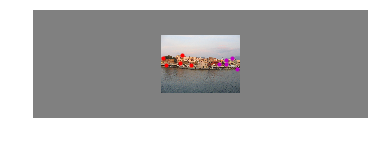

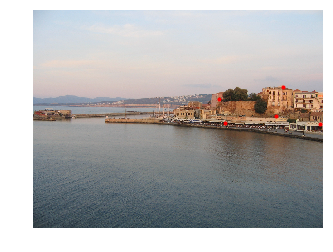

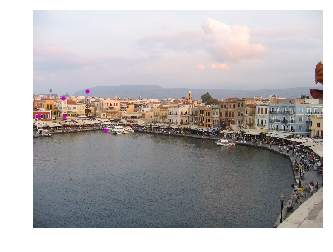

In [2]:
# Load data
data = sio.loadmat('PracticalData.mat', squeeze_me = True);
# Unpack data
# im1 is center image with grey background
im1 = data['im1']
# im2 is left image 
im2 = data['im2']
# pts1 and pts2 are matching points between image1 and image2
pts1 = data['pts1']
pts2 = data['pts2']
# im3 is right image
im3 = data['im3']
# pts1b and pts3 are matching points between image 1 and image 3
pts1b = data['pts1b']
pts3 = data['pts3']

# Show images and points 
plt.imshow(im1)
plt.plot(pts1[0,:],pts1[1,:],'r.')
plt.plot(pts1b[0,:],pts1b[1,:],'m.')
plt.axis('off')
plt.show()

plt.imshow(im2)
plt.plot(pts2[0,:],pts2[1,:],'r.')
plt.axis('off')
plt.show()

plt.imshow(im3)
plt.plot(pts3[0,:],pts3[1,:],'m.')
plt.axis('off')
plt.show()

The red ponits are matching points between image1 and image2, the magenta points are matching points between image1 and image3.

# **** TO DO **** Now use the functions you completed in part 1A (solveAXEqualsZero, calcBestHomography) to make a panoramic image. 

In [3]:
def solveAXEqualsZero(A):
    # TO DO: Write this routine - it should solve Ah = 0
    # A=UL(V.T)
    # Suppose A is a i by j matrix, the u will be a i by i matrix, s will be a i by j matrix and
    # v will be a j by j matrix.
    u,s,v=np.linalg.svd(A)
    # Take last column of v
    v=v.T
    h=v[:,-1]
    return h

In [4]:
# This function should apply the direct linear transform (DLT) algorithm to calculate the best 
# homography that maps the points in pts1Cart to their corresonding matching in pts2Cart
def calcBestHomography(pts1Cart, pts2Cart):    
    # TO DO: replace this
    H = []

    # TO DO: 
    # First convert points into homogeneous representation
    pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
    pts2Hom = np.concatenate((pts2Cart, np.ones((1,pts2Cart.shape[1]))), axis=0)
    
    # Then construct the matrix A, size (n_points,9)
    n_points=2*pts1Hom.shape[1]
    A=np.zeros((n_points,9))
    for i in range(5):
        u_v_1=pts1Hom[:,i]
        x_y_1=pts2Hom[:,i]
        A[2*i,:]=np.hstack(([0,0,0],-u_v_1,x_y_1[1]*u_v_1))
        A[2*i+1,:]=np.hstack((u_v_1,[0,0,0],-x_y_1[0]*u_v_1))
    
    # Solve Ah = 0
    h=solveAXEqualsZero(A)

    # Reshape h into the matrix H, values of h go first into rows of H
    H=np.reshape(h,(3,3))
    
    return H

In [5]:
# TO DO: Calculate homography from pts1 to pts2 
HEst = calcBestHomography(pts1, pts2)
# TO DO:
row1= im1.shape[0]
col1= im1.shape[1]
row2= im2.shape[0]
col2= im2.shape[1]
# For every pixel in image 1:
for x in range(1,row1+1):
    for y in range(1,col1+1):
        # Define a set of two-dimensional Cartesian points
        pts1Cart = np.array([[y],
                            [x]])
        # Convert points into homogeneous representation
        pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
        # Apply the best homography to the points
        pts2Hom = np.matmul(HEst,pts1Hom)
        # Convert back to Cartesian coordinates
        pts2Cart = pts2Hom[0:2,:] / np.tile([pts2Hom[2,:]],(2,1))
        #print (pts2Cart.shape)
    # Transform this pixel position with your homography to find where it is in the coordinates of image 2
    # If it the transformed position is within the boundary of image 2:
        if 1<np.round(pts2Cart[0,0])<(col2+1) and 1<np.round(pts2Cart[1,0])<(row2+1):
            #Copy pixel colour from image 2 pixel to current position in image 1 
            im1[x-1,y-1,:] = im2[int(np.round(pts2Cart[1,0]))-1,int(np.round(pts2Cart[0,0]))-1,:]

In [6]:
# TO DO: Repeat the above process mapping image 3 to image 1.
# TO DO: Calculate homography from pts1 to pts3 
HEst = calcBestHomography(pts1b, pts3)
# TO DO:
row3= im2.shape[0]
col3= im2.shape[1]
# For every pixel in image 1:
for x in range(1,row1+1):
    for y in range(1,col1+1):
        # Define a set of two-dimensional Cartesian points
        pts1Cart = np.array([[y],
                            [x]])
        # Convert points into homogeneous representation
        pts1Hom = np.concatenate((pts1Cart, np.ones((1,pts1Cart.shape[1]))), axis=0)
        # Apply the best homography to the points
        pts3Hom = np.matmul(HEst,pts1Hom)
        # Convert back to Cartesian coordinates
        pts3Cart = pts3Hom[0:2,:] / np.tile([pts3Hom[2,:]],(2,1))
        #print (pts2Cart.shape)
    # Transform this pixel position with your homography to find where it is in the coordinates of image 3
    # If it the transformed position is within the boundary of image 3:
        if 1<np.round(pts3Cart[0,0])<(col3+1) and 1<np.round(pts3Cart[1,0])<(row3+1):
            #Copy pixel colour from image 3 pixel to current position in image 1 
            im1[x-1,y-1,:] = im3[int(np.round(pts3Cart[1,0]))-1,int(np.round(pts3Cart[0,0]))-1,:]

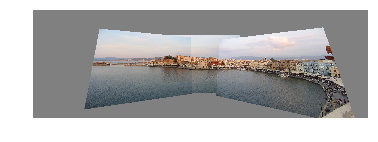

In [7]:
# Draw new image1
# Plot the final panorama
plt.imshow(im1)
plt.axis('off')
plt.show()

The figure above shows the panoramic image of image1, image2 and image3 after matching.